# COMP SCI 1015 IAP - W07 Workshop

## Introduction
Tkinter stands for **TK interface**, a Python interface to Tk GUI toolkit. You will often see Tcl/Tk together in the literature. Tcl is a dynamic programming language, while Tk is a graphical user interface toolkit for desktop development. They were both available around late 1980. Tcl/Tk has a long history with an active developer community maintaing them across all major platforms.Tkinter is the de facto Python UI. It is easy to use and great for prototyping simple UI. The look is a bit outdated though.

## <font color=red>BEFORE WE START CODING</font>

- NOTE 1: you MUST close the GUI window before you run the next cell (to leave the mainloop()). 
- NOTE 2: the `mainloop()` sometimes blocks or crashes the notebook. If the notebook hangs for an extended period, you might need to restart your Jupyter Kernel.
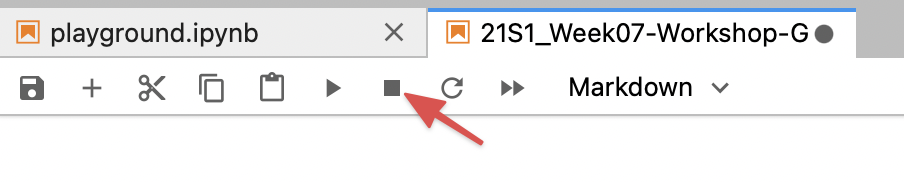
- NOTE 3: You should use **"import tkinter"** instead of **"import Tkinter"**. (Python is case sensitive!)

---
## Demo 1 - Window and widgets

### Window 

Let's do the most basic one, creating a window. Usually you would end your tkinter program with window.mainloop(). This is an infinite loop that keeps updating the UI elements and waits for user interaction such as mouse clicking or text inputs. Because it is an inf loop, the mainloop() method also block all the code after it until the window is closed.<br>

In [2]:
import tkinter as tk # import tkinter module

window = tk.Tk()
window.geometry('300x300+600+600') # window size as 300 x 300, window position at (600, 600)
window.mainloop() # mainloop keeps updating GUI and waiting for events


With the main window, we can start adding **widgets** into it. You can find a list of basic widgets at https://tkdocs.com/tutorial/widgets.html

### Label

- **tk.Label(...)** create an instance of the label widget 
- **.pack()** method puts the label instance into the window

You can find the color chart for TKinter at https://tcl.tk/man/tcl8.6/TkCmd/colors.htm

In [3]:
import tkinter as tk

window = tk.Tk()

label = tk.Label( # our first label widgert
    text = 'this is label',
    foreground = 'green'#optional, change the text color
    ) 
label.pack() # .pack method adds the label to the window.

window.mainloop()

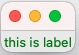

### Button

Let's try widgets that are interactive. Example below adds a button to the window. Again, make sure you call the pack() method to add the button into the window.<br>


In [4]:
import tkinter as tk

window = tk.Tk()

bnt = tk.Button(
    text = "click me",
    width = 10,
    foreground = 'green'
)
bnt.pack()

window.mainloop()

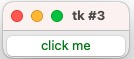

### Text Entry

Text entry is another useful widget that you will use a lot. It allows the user to input texts into the widget.

In [ ]:
import tkinter as tk

win = tk.Tk()

entry = tk.Entry(fg="yellow", bg="blue", width=20)
entry.insert('end', 'Input text...')
entry.pack()

win.mainloop()

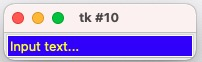

### Listbox

List box works like a list object, you can insert item into it with its insert() method. The first argument, a string `end`, instructs Python to insert the item at the end of the listbox

In [ ]:
import tkinter as tk

win = tk.Tk()

listbox = tk.Listbox(win)
listbox.insert('end', "a list entry")

#add five more items into the listbox
for i in range(5):
    listbox.insert('end', f'item {i}')

listbox.pack()
    
win.mainloop()

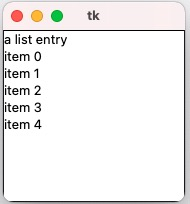

---
## Activity 1 - Making your first UI

<!-- BEGIN QUESTION -->

In activity 1 & 2 we will create a simplified log system. First, we will create the UI that consists of three widgets: listbox, text entry, and button.

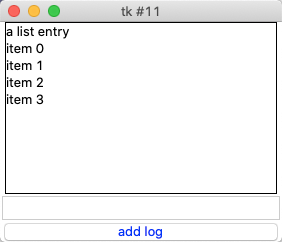

In [ ]:
import tkinter as tk

win = tk.Tk() #create a main window
win.title("tk #11")

# CREATE A LISTBOX
listbox = tk.Listbox(win)
listbox.insert('end', "a list entry")
for i in range(4):
    listbox.insert('end', f'item {i}')

listbox.pack()

# CREATE A TEXT ENTRY
entry = tk.Entry()
entry.pack()

# CREATE A BUTTON
bnt = tk.Button(
    text = "add log",
    width = 10,
    foreground = 'blue'
)
bnt.pack()

win.mainloop()

<!-- END QUESTION -->

---
## Demo 2 - Events and event handlers

So far you have learned how to create the user interface with windows and widgets. However, these interface components do not react to user inputs. Here we start working on the internal of UIs and make them actually work!

In tkinter and other GUI framework, user interaction, such as button clicking or entering text, would trigger an **event**. The `windows.mainloop()` starts the **event loop**, and your program keeps monitoring if there is any **event** happening.

The **event loop** is automatically handeled by the Tkinter. But we need to manually write **event handler** functions for the **events** in the application.

For example, the code below create a window. Then it uses the `.bind()` function that
- bind the *left-click mouse event* to the function `on_mouse_lclick`
- bind the *right-click mouse event* to the function `on_mouse_rclick`
- bind the *key pressed event* to the function `on_key`

You can find the most common events at https://web.archive.org/web/20190512164300/http://infohost.nmt.edu/tcc/help/pubs/tkinter/web/event-types.html

In [ ]:
import tkinter as tk # import tkinter module

def on_mouse_lclick(event): # <-- an event handler
    print('left button')
    
def on_mouse_rclick(event): # <-- another event handler
    print('right button')

def on_key(event):
    print(f'{event.char} pressed')
    
window = tk.Tk()

window.bind("<Button-1>", on_mouse_lclick) # left-click event
window.bind("<Button-2>", on_mouse_rclick) # right-click event
window.bind("<Key>", on_key) # key pressed event

window.mainloop() 

Below is another example where when the user clicked the button, the text of the label change from "hello world" to "button clicked".
We can update the configuration of the widget via **widget_name["config_name"]**, for example `label["text"] = "button clicked"`

In [ ]:
import tkinter as tk

def on_button_click(event):
    label["text"] = "button clicked"

# Initialise the UI with a label and a button
window = tk.Tk()
label = tk.Label(
    text= 'hello world',
    foreground = 'red'
)
label.pack()

bnt = tk.Button(
    text = 'click me',
    width = 10
)
bnt.pack()

# Bind the on_button_click to the button 
bnt.bind("<Button-1>", on_button_click)
window.mainloop()

---
## Activity 2 - An interactive GUI

<!-- BEGIN QUESTION -->

Now let's make the UI in activity 1 interactive!

The user should be able to input text into the text entry. Once clicked the `add log` button, the item should appear in the listbox.

You can obtain the content of text entry by calling the get function, e.g. `entry.get()` and you can delete the listbox content by calling the `delete` method, for example, `listbox.delete(0, tk.END)`.

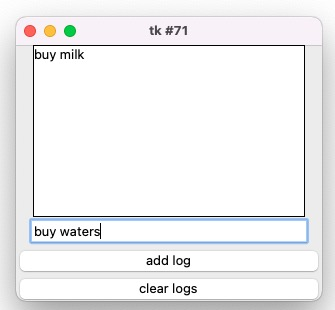

In [1]:
import tkinter as tk

def on_add_log(event):
    # INSERT YOUR CODE
    # ~ 3 LINES
    text = entry.get()
    listbox.insert(tk.END, text)

    
def on_clear_log(event):
    # INSERT YOUR CODE
    # ~ 1 LINE
    listbox.delete(0, tk.END)
    
win = tk.Tk()

#list box
listbox = tk.Listbox(win, width = 30)
listbox.pack()

#text entry
entry = tk.Entry(width = 30)
entry.pack()

#button
bnt = tk.Button(
    text = 'add log',
    width = 30, 
)
bnt.pack()
# INSERT YOUR CODE
# Bind the button to the function on_add_log
bnt.bind('<Button-1>', on_add_log)

#button
bnt2 = tk.Button(
    text = 'clear logs',
    width = 30,  # you can specify the size of your widget
)
bnt2.pack() # add the bnt instance to thw window
# INSERT YOUR CODE
# Bind the button to the function on_clear_log
bnt2.bind('<Button-1>', on_clear_log)

win.mainloop()

<!-- END QUESTION -->

---
## Demo 3: Separation of Data and UI 

We talked about the model-view-controller paradigm in the video and here let's implement a simplified version that separates the **data** from the **UI**. 

Here we create a new function `update_listbox` which update the content of the listbox based on a list variable. The function takes a list variable `items` and load those values into the listbox UI. Note that the line `lb.delete('0', 'end')` completely reset the listbox before updating it. Reset the whole listbox is certainly not the most efficient approach. However, doing so reflects the idea of the separation between data and UI and you will see it simplifies the code a lot in the following activities. 

(As a side note, UI redraws itself all the time. For example, whenever you move a window on your desktop, the OS redraw the whole window completely! Just that the computer redraw it so fast that you feels like you are physically moving a window.)


In [ ]:
import tkinter as tk

def update_listbox(items):
    # Clear the entire listbox
    lb.delete('0','end') 

    # Add all items back
    for e in items: 
        lb.insert('end', e) # add items


# initialise UI
win = tk.Tk()
lb = tk.Listbox(win)
lb.pack()

# your data
items = ['milk', 'toast', 'eggs']        
update_listbox(items)        

win.mainloop()

And we can create an interactive UI by adding a button to it. 

In [ ]:
import tkinter as tk
import random

def update_listbox(items):
    # Clear the entire listbox
    lb.delete('0','end') 

    # Add all items back
    for e in items: 
        lb.insert('end', e) # add items
                
def on_add_1(event):
    global data
    x = len(data)
    data.append(x)
    update_listbox(data) # call this function whenever we want to refresh the UI

def on_add_5(event):
    global data

    for i in range(5):
        data.append(random.random())
        
    update_listbox(data) # again, just call this function and it will update the list
    
# initialise data
data = []
    
# initialise UI
win = tk.Tk()
lb = tk.Listbox(win)
lb.pack()

bnt = tk.Button(
    text = 'add item',
)
bnt.pack()
bnt.bind("<Button-1>", on_add_1)

bnt = tk.Button(
    text = 'add 5 items',
)
bnt.pack()
bnt.bind("<Button-1>", on_add_5)

win.mainloop()

---
## Activity 3: Remove items

<!-- BEGIN QUESTION -->

In this example, a list of items are automatically generated and put into the list box. 

Your task is to implement two delete functions.

1. `on_delete_index`: delete by index. For example, the user input `0` in the top text entry. When click the delete button, the 1st item in the list will deleted.
2. `on_delete_name`: delete by item name. For example, the user input `item7` in the bottom text entry. When click the delete button, the item with the same name will be deleted.

Please read the code below carefully and complete the two functions.

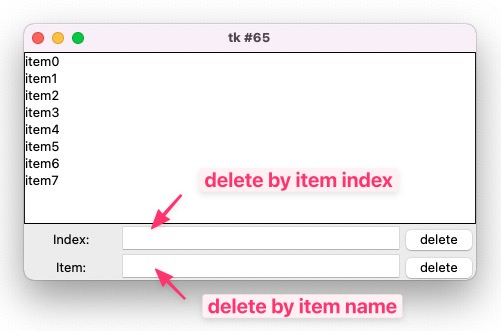

In [2]:
import tkinter as tk
import random

def init_data(n):
    '''initialise the listbox'''
    li = []
    for i in range(n):
        li.append(f'item{i}')
    return li

def update_listbox(items):
    # Clear the entire listbox
    lb.delete('0','end') 

    # Add all items back
    for e in items: 
        lb.insert('end', e) # add items
                
def on_delete_index(event):
    # INSERT YOUR CODE BELOW 
    # ~ 5 lines
    index = int(entry1.get())
    listbox.delete(index)
    
def on_delete_name(event):
    # INSERT YOUR CODE BELOW 
    # ~ 4 lines
    name = entry2.get()
    for i in range(listbox.size()):
        if listbox.get(i) == name:
            listbox.delete(i)
            break

    
# initialise UI
win = tk.Tk()
lb = tk.Listbox(win, width=50)
lb.pack()


# Widgets for remove items by index
frame1 = tk.Frame(width=50, height=20) # Details about frame is at the end of the notebook
frame1.pack()

lab = tk.Label(master=frame1, width = 10, text='Index:')
lab.pack(side=tk.LEFT)

entry1 = tk.Entry(master=frame1, width = 30)
entry1.pack(side=tk.LEFT)

bnt1 = tk.Button(
    master=frame1,
    text = 'delete',
)
bnt1.pack(side=tk.LEFT)
bnt1.bind("<Button-1>", on_delete_index)

frame2 = tk.Frame(width=50, height=20) # Details about frame is at the end of the notebook
frame2.pack()

# Widgets for remove items by name
lab = tk.Label(master=frame2, width = 10, text='Item:')
lab.pack(side=tk.LEFT)

entry2 = tk.Entry(master=frame2, width = 30)
entry2.pack(side=tk.LEFT)

bnt2 = tk.Button(
    master=frame2,
    text = 'delete',
)
bnt2.pack(side=tk.LEFT)
bnt2.bind("<Button-1>", on_delete_name)

# initialise data
data = init_data(8)
update_listbox(data)

win.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\lhyb3\AppData\Local\Temp\ipykernel_10932\261792495.py", line 23, in on_delete_index
    listbox.delete(index)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\tkinter\__init__.py", line 3218, in delete
    self.tk.call(self._w, 'delete', first, last)
_tkinter.TclError: invalid command name ".!listbox"


KeyboardInterrupt: 

<!-- END QUESTION -->

---
## Demo 4 - Layout

### .pack()

Tkinter controlled the layout of widgets through several **geometry managers**. The **.pack()** method we have been using is one, and others are **.grid()** and **.place()** . Below is an example that visualize the use of the `pack()` method. One importnat paramter for the pack geometry manager is `side`, which specifies which side should the window be filled. The default value is `tk.TOP`, meaning the widget is filled into the window from top to bottom. 

You can try the following options.
- tk.TOP
- tk.BOTTOM
- tk.LEFT
- tk.RIGHT <br>

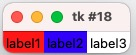

In [ ]:
import tkinter as tk

window = tk.Tk()

l1 = tk.Label(master = window, text = 'label1', bg = 'red')
l1.pack(side=tk.LEFT)
l2 = tk.Label(master = window, text = 'label2', bg = 'blue')
l2.pack(side=tk.LEFT)
l3 = tk.Label(master = window, text = 'label3', bg = 'white')
l3.pack(side=tk.LEFT)

window.mainloop()

### .grid()

.grid() split a frame into rows and cols. And we can put widget into the grid by specifying its row and column number.

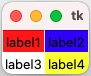

In [ ]:
import tkinter as tk

window = tk.Tk()

# note that width / height are related for font size for label

l1 = tk.Label(master = window, text = 'label1', bg = 'red', width=5, height=2) 
l1.grid(row=0, column=0)

l2 = tk.Label(master = window, text = 'label2', bg = 'blue', width=5, height=2)
l2.grid(row=0, column=1)

l3 = tk.Label(master = window, text = 'label3', bg = 'white', width=5, height=2)
l3.grid(row=1, column=0)

l4 = tk.Label(master = window, text = 'label4', bg = 'yellow', width=5, height=2)
l4.grid(row=1, column=1)

l5 = tk.Label(master = window, text = 'label4', bg = 'pink', width=10, height=2)
l5.grid(row=2, column=0, columnspan=2) # this button spans two columns

window.mainloop()

---
## Submission Exercise: Calculator

<!-- BEGIN QUESTION -->

Please 
- create the UI of a calculator as below.
    - you should use the `grid` layout
    - you should use the `button` widget for numbers
    - update the `label` of the result when the user clicks buttons.
- **[optional challenge]** make the calculator functional!
    - (hint) `event.widget['text']`
    - get the formula when the user clicks the `=` sign
    - use the provided `calc()` function to obtain the value

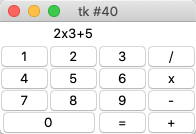

In [5]:
from ctypes import HRESULT
from struct import calcsize
import tkinter as tk

win = tk.Tk()

def on_cal_click(event):
    print(result["text"])
    # OPTIONAL: 
    # CALCULATE THE RESULT
    formula = result["text"]

    try:
        result_val = calcsize(formula)
        result["text"] = result_val
    except ValueError:
        result["text"] = "Error"
    
def on_btn_click(event):
    # COMPLETE THE LINE BELOW
    # Display the input
     current_text = result["text"]
     clicked_text = event.widget["text"]
new_text = current_text + clicked_text
HRESULT["text"] = new_text

# text field
result = tk.Label(master=win, text = '')
result.grid(row=0, columnspan=4)

# numpad
for i in range(3):
    for j in range(3):
        # COMPLETE THE LINE BELOW
        # Create a button with the right text on it
        digit = 9 - (i * 3 + j)
        btn = tk.Button(master=win, text=str(digit), width=5)
        btn.grid(row=i+1, column=j)
        btn.bind("<Button-1>", on_btn_click)

        
btn = tk.Button(master=win, text='0', width=5)
btn.grid(row=4, column=0, columnspan=2)
btn.bind("<Button-1>", on_btn_click)

btn = tk.Button(master=win, text='=', width=5)
btn.grid(row=4, column=2)
btn.bind("<Button-1>", on_cal_click)

# operators
op = ['/', 'x', '-', '+']
for i in range(4):
    # COMPLETE THE LINE BELOW
    # Create a button with the right text on it
    btn = tk.Button(master=win, text=op[i], width=5)
    btn.grid(row=i+1, column=4)
    btn.bind("<Button-1>", on_btn_click)
                
win.mainloop()

NameError: name 'current_text' is not defined

In [ ]:
# YOU DO NOT NEED TO UPDATE THIS CELL
import re
def calc(eq):
    '''help function that evaluates the provided equation'''
    s = eq
    s = s.replace(' ', '') # remove spaces
    sl = re.split(r'([+-/x])', s) # split the string with regular expression
    print(sl)

    # write your code below
    eq = sl

    ops='+-/x'
    for i in range(len(eq)):
        if not (eq[i] in ops):
            eq[i] = float(eq[i])

    eq1 = []
    i = 0
    while i < len(eq):
        e = eq[i]    
        if(e == '/' or e == 'x'):
            #pop last element if encounter * or /
            l = eq1.pop()
            r = eq[i+1]
            #print(f'{l}{e}{r}')
            if(e == 'x'):
                e = l * r
            else:
                e = l / r
            eq1.append(e)
            i = i + 2
        else:
            eq1.append(e)
            i = i + 1
#     print(eq1)

    # now eq1 should only has + or -, then just do it sequentially
    s = float(eq1[0])
    for i in range(1, len(eq1), 2):
        r = float(eq1[i+1])
        if(eq1[i] == '+'):
            s = s + r
        else:
            s = s - r
#     print(s)
    return s

eq = '32x50'
calc(eq)


<!-- END QUESTION -->

---
## Extention

### Container Widget - Frame 
Frame is a special widget that can **contain** other widgets. A Frame represents a rectangular area has its own boarder and background and is often used to group widgets together for layout purpose. <br>
Code below create two frames with its own background color as an example.

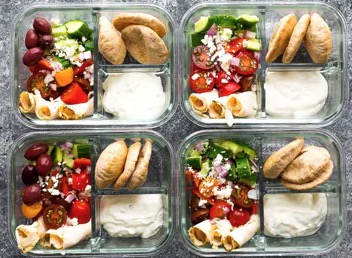

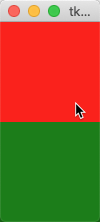

In [ ]:
import tkinter as tk

window = tk.Tk()

frame1 = tk.Frame(master=window, width=100, height=100, bg="red")
frame1.pack()

frame2 = tk.Frame(master=window, width=100, height=100, bg="green")
frame2.pack()

window.mainloop()

The code below embeds labels into frames by specifying their master as the frame widget. In a sense, the frame widget works like a lunchbox compartments that you can put together in different ways to create the layout you like.

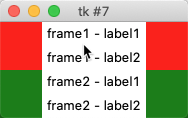

In [ ]:
import tkinter as tk

window = tk.Tk()

frame1 = tk.Frame(master=window, width=100, height=100, bg="red")
frame1.pack(fill=tk.BOTH)

# EMBED WIDGET HERE
label = tk.Label(
    master = frame1,
    text = 'frame1 label1'
)
label.pack()

label2 = tk.Label(
    master = frame1,
    text = 'frame1 label2'
)
label2.pack()

frame2 = tk.Frame(master=window, width=100, height=100, bg="green")
frame2.pack(fill=tk.BOTH)

# EMBED WIDGET HERE
# EMBED WIDGET HERE
label3 = tk.Label(
    master = frame2,
    text = 'frame2 label1'
)
label3.pack()

label4 = tk.Label(
    master = frame2,
    text = 'frame2 label2'
)
label4.pack()

window.mainloop()

Recall that each frame can serve as a widget container that contains one layout and other widgets. Code below embed frames into frames to create the desired layout.

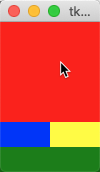

In [ ]:
import tkinter as tk

window = tk.Tk()

frame1 = tk.Frame(master=window, width=100, height=100, bg="red")
frame1.pack(fill=tk.BOTH, side=tk.TOP, expand=True)

frame2 = tk.Frame(master=window, width=50, height=50)
frame2.pack(fill=tk.X, side=tk.TOP, expand=True)

#note frame 3 and frame 4 are embedded in frame2 and they have their own layout option side=tk.LEFT
frame3 = tk.Frame(master=frame2, width=25, height=25, bg="blue") 
frame3.pack(fill=tk.BOTH, side=tk.LEFT, expand=True)

frame4 = tk.Frame(master=frame2, width=25, height=25, bg="yellow")
frame4.pack(fill=tk.BOTH, side=tk.LEFT, expand=True)

frame5 = tk.Frame(master=window, width=25, height=25, bg="green")
frame5.pack(fill=tk.BOTH, side=tk.TOP, expand=True)

window.mainloop()